# Iris dataset

2 attributes

`pip install tensorflow`


In [16]:
import tensorflow as tf
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [17]:
# Check TensorFlow version
print("TensorFlow version:", tf.__version__)

TensorFlow version: 2.12.1


In [18]:
# Read data
iris = datasets.load_iris()

# Create a DataFrame
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df["target"] = iris.target

In [19]:
# Shuffle the DataFrame (frac=1 means all rows)
# This is because the validatio split is done by taking the last % of the data. 
# If the data is not shuffled, the validation set will contain only the last class
print(df["target"].values)
df = df.sample(frac=1, random_state=0)
print(df.target.values)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
[2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0 2 1 0 2 2 1 0
 1 1 1 2 0 2 0 0 1 2 2 2 2 1 2 1 1 2 2 2 2 1 2 1 0 2 1 1 1 1 2 0 0 2 1 0 0
 1 0 2 1 0 1 2 1 0 2 2 2 2 0 0 2 2 0 2 0 2 2 0 0 2 0 0 0 1 2 2 0 0 0 1 1 0
 0 1 0 2 1 2 1 0 2 0 2 0 0 2 0 2 1 1 1 2 2 1 1 0 1 2 2 0 1 1 1 1 0 0 0 2 1
 2 0]


In [20]:
# 2 Attributes
X = df.iloc[:, 2:4].values
y = df["target"].values


# Split data into training and testing data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=1, stratify=y
)

# Standardization
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

## Model building


In [21]:
tf.keras.backend.clear_session()

model = tf.keras.Sequential(
    [
        tf.keras.layers.InputLayer(input_shape=(2,)),
        tf.keras.layers.Dense(units=16, activation="sigmoid", name="hidden1"),
        tf.keras.layers.Dense(units=3, activation="softmax", name="output"),
    ]
)

model.summary()

adam = tf.keras.optimizers.Adam(learning_rate=0.001)

model.compile(
    optimizer=adam, loss="sparse_categorical_crossentropy", metrics=["accuracy"]
)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hidden1 (Dense)             (None, 16)                48        
                                                                 
 output (Dense)              (None, 3)                 51        
                                                                 
Total params: 99
Trainable params: 99
Non-trainable params: 0
_________________________________________________________________


# Model training


In [22]:
tf_fit = model.fit(
    x=X_train_std, y=y_train, batch_size=16, validation_split=0.2, epochs=200, verbose=1
)

Epoch 1/200


6/6 [==============================] - 1s 32ms/step - loss: 1.1548 - accuracy: 0.3452 - val_loss: 1.1888 - val_accuracy: 0.2857
Epoch 2/200
6/6 [==============================] - 0s 6ms/step - loss: 1.1353 - accuracy: 0.3452 - val_loss: 1.1727 - val_accuracy: 0.2857
Epoch 3/200
6/6 [==============================] - 0s 6ms/step - loss: 1.1156 - accuracy: 0.3452 - val_loss: 1.1535 - val_accuracy: 0.2857
Epoch 4/200
6/6 [==============================] - 0s 6ms/step - loss: 1.0971 - accuracy: 0.3690 - val_loss: 1.1345 - val_accuracy: 0.2857
Epoch 5/200
6/6 [==============================] - 0s 6ms/step - loss: 1.0812 - accuracy: 0.4048 - val_loss: 1.1174 - val_accuracy: 0.3810
Epoch 6/200
6/6 [==============================] - 0s 6ms/step - loss: 1.0649 - accuracy: 0.4643 - val_loss: 1.1016 - val_accuracy: 0.4762
Epoch 7/200
6/6 [==============================] - 0s 6ms/step - loss: 1.0509 - accuracy: 0.5357 - val_loss: 1.0860 - val_accuracy: 0.4762
Epoch 8/200
6/6 [=====================

In [23]:
# Inspect the training history
df = pd.DataFrame(tf_fit.history)
df.head()

,loss,accuracy,val_loss,val_accuracy
0,1.154804,0.345238,1.188846,0.285714
1,1.135326,0.345238,1.172660,0.285714
2,1.115602,0.345238,1.153550,0.285714
3,1.097085,0.369048,1.134503,0.285714
4,1.081175,0.404762,1.117365,0.380952


<Axes: title={'center': 'Loss'}, xlabel='Epoch', ylabel='Loss'>

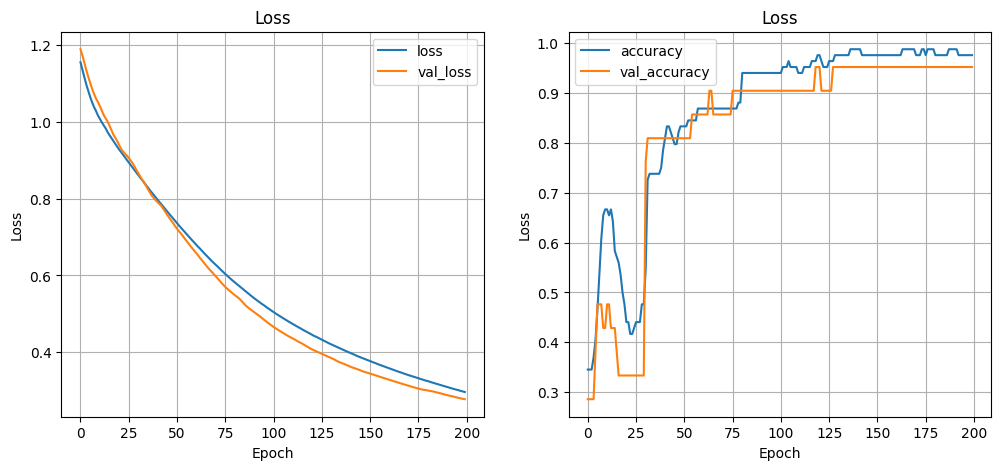

In [24]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

df[["loss", "val_loss"]].plot(
    ax=axes[0], title="Loss", grid=True, legend=True, xlabel="Epoch", ylabel="Loss"
)

df[["accuracy", "val_accuracy"]].plot(
    ax=axes[1], title="Loss", grid=True, legend=True, xlabel="Epoch", ylabel="Loss"
)

## Model evaluation


In [25]:
results = model.evaluate(X_test_std, y_test, verbose=0)
print(f"Test loss: {results[0]:.4f}   Test Acc.: {results[1]:.4f}")

Test loss: 0.2822   Test Acc.: 0.9556


## Prediction


In [26]:
y_hat = model(X_test_std[:3])
print(y_hat.numpy())

[[0.00386401 0.2824613  0.71367466]
 [0.8772343  0.12171694 0.0010488 ]
 [0.8690659  0.12985651 0.00107768]]


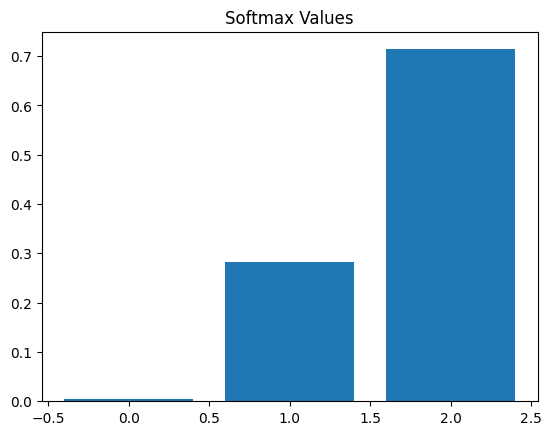

In [27]:
yp = y_hat.numpy()[0]
xp = list(range(yp.shape[0]))
plt.bar(xp, yp)
plt.title("Softmax Values")
plt.show()

In [28]:
np.argmax(y_hat, axis=1)

array([2, 0, 0], dtype=int64)

## Decision surface


313/313 [==============================] - 0s 632us/step


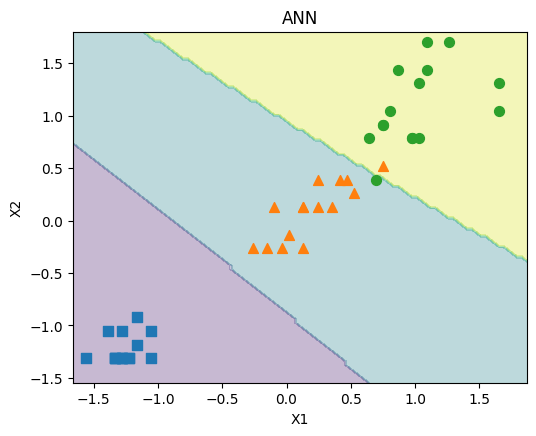

In [29]:
XP = sc.transform(X)
x_min = XP[:, 0].min() - 0.1
x_max = XP[:, 0].max() + 0.1
y_min = XP[:, 1].min() - 0.1
y_max = XP[:, 1].max() + 0.1

xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
f, ax = plt.subplots(1, 1, figsize=(6, 5))
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = np.argmax(Z, axis=1)  # Find the class label
Z = Z.reshape(xx.shape)

ax.contourf(xx, yy, Z, alpha=0.3)
markers = ("s", "^", "o", "v", "x")
for idx, lb in enumerate(np.unique(y_test)):
    ax.scatter(
        X_test_std[y_test == lb, 0],
        X_test_std[y_test == lb, 1],
        marker=markers[idx],
        s=50,
    )

ax.set_title("ANN")
ax.set_xlabel("X1")
ax.set_ylabel("X2")
plt.tight_layout(pad=3.0)
plt.show()